<a href="https://colab.research.google.com/github/raviyadav44/Time-Series/blob/main/Eelctricity_consumption_anylasis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install statsmodels --upgrade
!pip install pmdarima

Requirement already up-to-date: statsmodels in /usr/local/lib/python3.7/dist-packages (0.12.2)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

import warnings
warnings.filterwarnings("ignore")
import datetime
import statsmodels

In [3]:
df=pd.read_csv("/content/drive/MyDrive/anylasis/Electric_Production.csv")

In [4]:
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [5]:
df.tail()

,DATE,IPG2211A2N
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212
396,1/1/2018,129.4048


In [6]:
#rename columns to something more understandable
df.rename(columns={'DATE':'date', 'IPG2211A2N':'consumption'}, inplace=True)

In [7]:
#convert date column to datetime type
df['date'] = pd.to_datetime(df.date)

In [8]:
#set date as index
df.set_index('date', inplace=True)

In [9]:
#just get data from 2010 onwards
start_date = pd.to_datetime('2010-01-01')
df = df[start_date:]

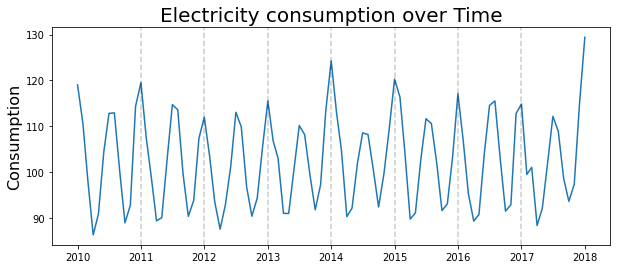

In [10]:
plt.figure(figsize=(10,4))
plt.plot(df.consumption)
plt.title('Electricity consumption over Time', fontsize=20)
plt.ylabel('Consumption', fontsize=16)
for year in range(2011,2018):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

#Checking for stationarity

In [11]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [12]:
adf_test(df['consumption'])

1. ADF :  -2.0073098471462467
2. P-Value :  0.28337721229071255
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 84
5. Critical Values :
	 1% :  -3.510711795769895
	 5% :  -2.8966159448223734
	 10% :  -2.5854823866213152


In [13]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
  print ('Results of KPSS Test:')
  kpsstest = kpss(timeseries, regression='c')
  kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
  for key,value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key] = value
  print (kpss_output)

In [14]:
kpss_test(df['consumption'])

Results of KPSS Test:
Test Statistic            0.167534
p-value                   0.100000
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


#Ploting acf with 100 lags

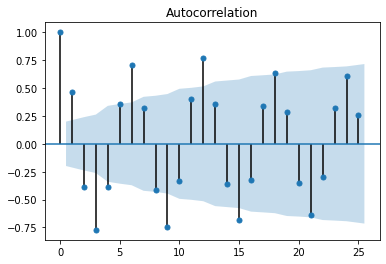

In [15]:
acf_plot = plot_acf(df.consumption, lags=25)

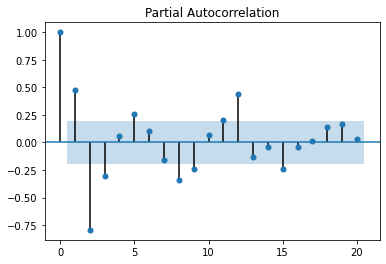

In [16]:
pacf_plot = plot_pacf(df.consumption)

In [29]:
# Get training and testing sets
train_end = datetime.date(2011,12,1)
test_end = datetime.date(2017,12,1)

train_data= df.consumption[:train_end]
test_data= df.consumption[train_end+ datetime.timedelta(days = 1):test_end]

In [30]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['consumption'],trace=True ,
                          suppress_warnings=True)           

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=558.951, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=722.600, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=697.571, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=663.258, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1176.578, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=644.675, Time=0.44 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=597.890, Time=0.28 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=553.967, Time=0.42 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=579.607, Time=0.37 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=562.842, Time=0.49 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=570.984, Time=0.48 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=580.356, Time=0.43 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=554.309, Time=0.54 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Tim

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   97
Model:               SARIMAX(3, 0, 2)   Log Likelihood                -269.984
Date:                Sat, 03 Jul 2021   AIC                            553.967
Time:                        07:38:08   BIC                            571.990
Sample:                             0   HQIC                           561.255
                                 - 97                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     79.1887     10.574      7.489      0.000      58.463      99.914
ar.L1          1.2216      0.102     11.952      0.000       1.021       1.422
ar.L2         -1.2213      0.107    -11.442      0.000      -1.431      -1.012
ar.L3          0.2272      0.108      2.100      0.036       0.015       0.439
ma.L1         -0.7873      0.035    -22.352      0.000      -0.856      -0.718
ma.L2          0.9634      0.057     16.933      0.000       0.852       1.075
sigma2        13.9316      1.605      8.679      0.000      10.786      17.078
===================================================================================
Ljung-Box (L1) (Q):                   1.11   Jarque-Bera (JB):                19.60
Prob(Q):                              0.29   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                             0.14
Prob(H) (two-sided):                  0.05   Kurtosis:                         5.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
#Fit the AR model
model = statsmodels.tsa.arima_model.ARMA(train_data, order=(3,0))
model_fit = model.fit()
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:            consumption   No. Observations:                   24
Model:                     ARMA(3, 0)   Log Likelihood                 -64.813
Method:                       css-mle   S.D. of innovations              3.283
Date:                Sat, 03 Jul 2021   AIC                            139.627
Time:                        07:38:16   BIC                            145.517
Sample:                    01-01-2010   HQIC                           141.190
                         - 12-01-2011                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               102.4217      0.566    181.005      0.000     101.313     103.531
ar.L1.consumption     0.6882      0.210      3.279      0.001       0.277       1.100
ar.L2.consumption    -0.

In [32]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [33]:
predictions = model_fit.predict(start= pred_start_date, end = pred_end_date)
residual = test_data - predictions

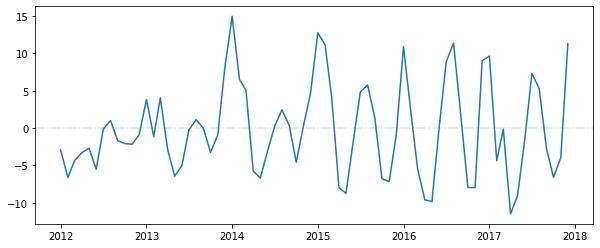

In [34]:
plt.figure(figsize=(10,4))
plt.plot(residual)
plt.axhline(0, linestyle = "-.", alpha = 0.2)

In [35]:
prediction_rolling = pd.Series()

for end_date in test_data.index:
    train_data = df.consumption[:end_date-datetime.timedelta(days=1)]
    model = statsmodels.tsa.arima_model.ARMA(train_data, order=(3,0))
    model_fit = model.fit()
    pred = model_fit.predict(end_date)
    prediction_rolling.loc[end_date] = pred.loc[end_date]

In [36]:
residuals_rolling = test_data - prediction_rolling

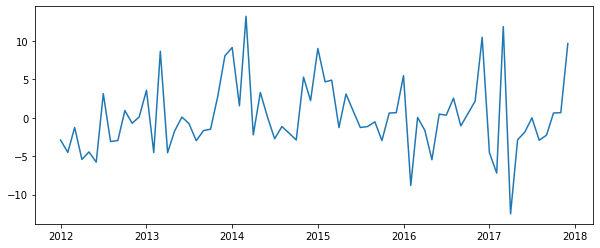

In [37]:
plt.figure(figsize=(10, 4))
plt.plot(residuals_rolling)

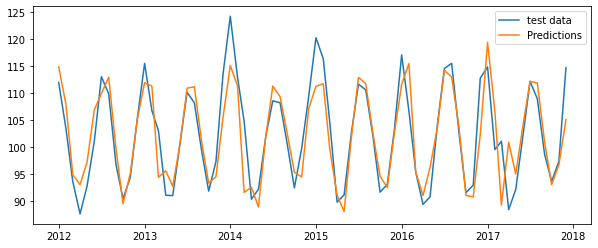

In [38]:
plt.figure(figsize=(10, 4))
plt.plot(test_data)
plt.plot(prediction_rolling)

plt.legend(["test data", "Predictions"])